In [2]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
A0 = 0.05984281113 
CLA = 4.752798721
CLA_STALL = -3.85 
CDA = 0.6417112299
CDA_STALL = -0.9233984055
ALPHA_STALL = 0.3391428111
WINGAREA = 0.6
AIR_DENSITY = 1.2041
MASS = 1.5
G = 9.81

In [4]:
def calc_cl(angle_of_attack):
    clift = CLA * (angle_of_attack - A0)
    return clift

def calc_v_stall(clMax):
    vStall = np.sqrt((2 * MASS * G) / (AIR_DENSITY * WINGAREA * clMax))
    return vStall

In [5]:
angleList = np.arange(0, ALPHA_STALL, 0.01 * np.pi/180)
coefficient_lift_list = [calc_cl(angle) for angle in angleList]
clMax = max(coefficient_lift_list)
clMaxWeights = [.9, .8, .7, .6]
vStall = calc_v_stall(clMax)
angleListDegrees = np.rad2deg(angleList)

# velocity at 5 load factor
structural_limit = np.sqrt((2 * 5 * MASS * G) / (clMax * WINGAREA * AIR_DENSITY))
print(structural_limit)


12.387473850995205


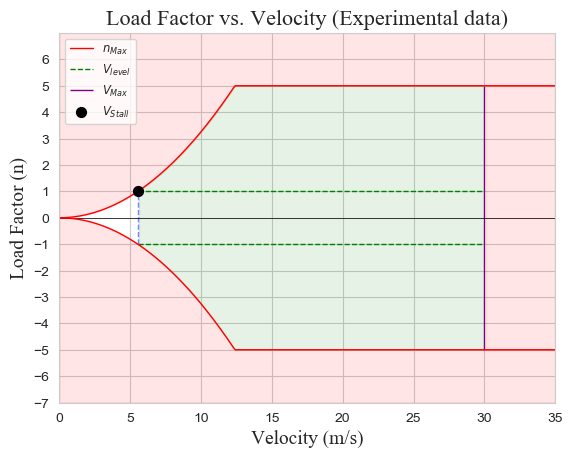

In [6]:
sns.set_style('whitegrid')
sns.set_palette("flare")
font = "times new roman"
fontsizeT = 16
fontsizeL = 14
fig, ax1 = plt.subplots()

velocities = np.linspace(0, 35, 300)
calc_load_factor_lists = []
calc_load_factor_list = []
bounds = []

for v in velocities:
    dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
    lift = clMax * WINGAREA * dynamic_pressure
    load_factor = lift / (MASS * G)
    calc_load_factor_list.append(load_factor)
calc_load_factor_lists.append(calc_load_factor_list)
for weight in clMaxWeights:
    calc_load_factor_list = []
    for v in velocities:
        dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
        lift = clMax * weight * WINGAREA * dynamic_pressure
        load_factor = lift / (MASS * G)
        calc_load_factor_list.append(load_factor)
    calc_load_factor_lists.append(calc_load_factor_list)

line_styles = ['-', '-', '-', '-', '-']
line_labels = ['$Cl_{Max}$', '$n_{Max}$', '$Cl_{Max}$ ⋅ 0.8', '$Cl_{Max}$ ⋅ 0.7', '$Cl_{Max}$ ⋅ 0.6']
line_colors = ['red', '#370617', '#6A040F', '#9D0208', '#D00000']
line_opac = [1, 0.8, 0.6, 0.4, 0.2]

# v-n top limit
load_fac_5 = [min(load_factor, 5) for load_factor in calc_load_factor_lists[0]]
ax1.plot(velocities, load_fac_5, color=line_colors[0], linestyle='-', label=line_labels[1], alpha=1, linewidth=1)

# v-n bot limit 
mirrored_load_fac_5 = [-load_factor for load_factor in load_fac_5]
ax1.plot(velocities, mirrored_load_fac_5, color=line_colors[0], linestyle='-', alpha=1, linewidth=1)

# structural limits
# ax1.hlines(y=5, linestyle='--', xmin=structural_limit, xmax=35, linewidth=1, color='red')
# ax1.hlines(y=5, linestyle='--', xmin=structural_limit, xmax=35, linewidth=1, color='red')

# green steady level flight
ax1.hlines(y=1, color='green', label='$V_{level}$', linestyle='--', alpha=1, linewidth=1, xmin=vStall, xmax=30)
ax1.hlines(y=-1, color='green', linestyle='--', alpha=1, linewidth=1, xmin=vStall, xmax=30)

# shading_mask1 = np.array(velocities) <= vStall
# first blue line 
# ax1.fill_between(velocities, load_fac_5, mirrored_load_fac_5, where=shading_mask1, color='blue', alpha=0.1)
shading_mask2 = np.logical_and(np.array(velocities) >= vStall, np.array(velocities) <= 30)
ax1.fill_between(velocities, load_fac_5, mirrored_load_fac_5, where=shading_mask2, color='green', alpha=0.1)

# ax1.fill_between(velocities, load_fac_5, mirrored_load_fac_5, color='green', alpha=0.1)

# blue stall speed
ax1.vlines(x=vStall, ymin=-1, ymax=1, color='blue', linestyle='--', alpha=.5, linewidth=1)
# vmax
ax1.vlines(x=30, ymin=-5, ymax=5, color='purple', label='$V_{Max}$', linestyle='-', alpha=1, linewidth=1)
# after vmax
shading_mask_after_vmax = np.array(velocities) > 30
ax1.fill_between(velocities, load_fac_5, mirrored_load_fac_5, where=shading_mask_after_vmax, color='red', alpha=0.1)

# v-n labels
ax1.set_xlim(left=0, right=35)
ax1.set_xlabel('Velocity (m/s)', fontname=font, fontsize=fontsizeL)

ax1.set_yticks(np.arange(-7, 7, 1))
ax1.set_ylim([-7, 7])

# yellow shade 
# ax1.fill_between(velocities, load_fac_5, 10, where=(np.array(load_fac_5) < 5), color='red', alpha=0.2)
ax1.fill_between(velocities, load_fac_5, ax1.get_ylim()[1], color='red', alpha=0.1)
ax1.fill_between(velocities, mirrored_load_fac_5, ax1.get_ylim()[0], color='red', alpha=0.1)

ax1.set_ylabel('Load Factor (n)', fontname=font, fontsize=fontsizeL)
ax1.hlines(y=0, color='black', linestyle='-', alpha=1, linewidth=.5, xmin=0, xmax=35)

# points and labels
ax1.scatter(vStall, 1, color='black', marker='o', s=50, label='$V_{Stall}$', zorder=3)
# ax1.scatter(structural_limit, 5, color='blue', marker='o', label='Maneuvering Speed', s=50, zorder=3)
ax1.set_title('Load Factor vs. Velocity (Experimental data)', fontname=font, fontsize=fontsizeT)
ax1.grid(visible=True)
ax1.legend(fontsize='small')
fig.savefig(f"V-n_Diagram.svg")


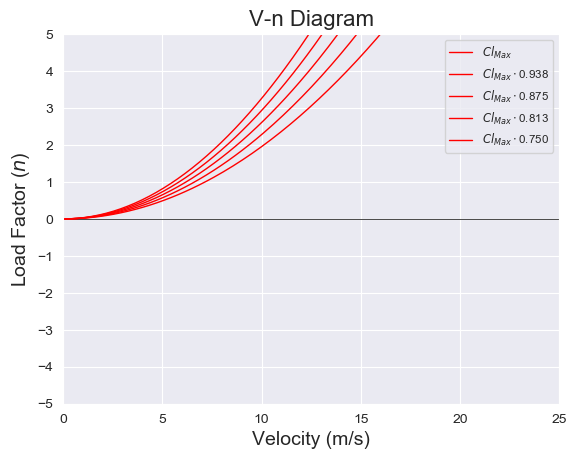

In [16]:
sns.set_style('darkgrid')
sns.set_palette('colorblind')
font = "times new roman"
fontsizeT = 16
fontsizeL = 14
fig, ax2 = plt.subplots()

velocities = np.linspace(0, 30, 250)
calc_load_factor_lists = []
calc_load_factor_list = []
bounds = []

for v in velocities:
    dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
    lift = clMax * WINGAREA * dynamic_pressure
    load_factor = lift / (MASS * G)
    calc_load_factor_list.append(load_factor)
calc_load_factor_lists.append(calc_load_factor_list)
for weight in clMaxWeights:
    calc_load_factor_list = []
    for v in velocities:
        dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
        lift = clMax * weight * WINGAREA * dynamic_pressure
        load_factor = lift / (MASS * G)
        calc_load_factor_list.append(load_factor)
    calc_load_factor_lists.append(calc_load_factor_list)

line_styles = ['-', '-', '-', '-', '-']
line_labels = ['$Cl_{Max}$', '$Cl_{Max}\cdot$0.938', '$Cl_{Max}\cdot$0.875', '$Cl_{Max}\cdot$0.813', '$Cl_{Max}\cdot$0.750']
line_colors = ['red', 'red', 'red', 'red', 'red']
line_opac = [1, 0.8, 0.6, 0.4, 0.2]

for load_factor, line_style, label, line_color, opacity in zip(calc_load_factor_lists, line_styles, line_labels, line_colors, line_opac):
    ax2.plot(velocities, load_factor, color=line_color, linestyle=line_style, label=label, alpha=1, linewidth=1)
    bounds.append((velocities, load_factor))

# structural limits
ax2.axhline(y=5, color='red', linestyle='--', alpha=1, linewidth=4, xmin=5, xmax=25)
ax2.axhline(y=-5, color='red', linestyle='--', alpha=1, linewidth=4, xmin=5, xmax=25)

ax2.set_yticks(np.arange(-7, 7, 1))

ax2.set_xlim(left=0, right=25)
ax2.set_xlabel('Velocity (m/s)', fontsize=fontsizeL)
ax2.set_ylim([-5, 5])
ax2.set_ylabel('Load Factor ($n$)', fontsize=fontsizeL)
ax2.hlines(y=0, color='black', linestyle='-', alpha=1, linewidth=.5, xmin=0, xmax=35)
ax2.set_title('V-n Diagram', fontsize=fontsizeT)
ax2.grid(visible=True)
ax2.legend(fontsize='small')
fig.savefig(f"V-nDiagram.svg")


In [8]:
def plot_data_from_csv(filename):
    # Read the data from the CSV file
    time_data = []
    true_v = []
    true_n = []
    predict_v = []
    predict_n = []
    bound = []

    with open(filename, "r") as f:
        csv_reader = csv.reader(f)
        next(csv_reader) # skip the header row
        for row in csv_reader:
            time_data.append(float(row[0]))
            true_v.append(float(row[1]))
            true_n.append(float(row[2]))
            predict_v.append(float(row[3]))
            predict_n.append(float(row[4]))
            bound.append(float(row[5]))

    fig, ax = plt.subplots()
    ax.plot(true_v, true_n, marker='o', linestyle='', markersize=4, label="N_prediction")
    ax.plot(predict_v, predict_n, marker='o', linestyle='', markersize=4, label="N_prediction")
    ax.legend()
    ax.set_xlabel("Velocity (m/s)")
    ax.set_ylabel("Load Factor")
    ax.set_title("V-n Diagram")
    
    # fig.savefig("V-n_Diagram.svg")


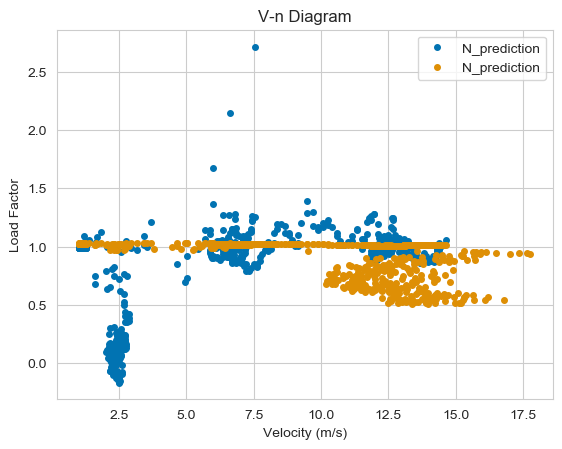

In [9]:
plot_data_from_csv("/home/taranto/catkin_ws/src/supervisor/flighttest/data/notused/drone_data_2023-04-21_14-04-39.csv")

In [10]:
csv_data = pd.read_csv("/home/taranto/catkin_ws/src/supervisor/flighttest/data/notused/drone_data_2023-04-21_14-04-39.csv")

In [11]:

# Define a function to determine the color
def get_color(row, bounds):
    for i, (x, y) in enumerate(bounds):
        # Find the index of the closest x value to row['true_velocity']
        closest_x_index = np.abs(np.array(x) - row['true_velocity']).argmin()

        # Access the corresponding y value
        y_value = y[closest_x_index]

        if row['predicted_n'] > y_value:
            return line_colors[i]
    return 'black'


# Process the CSV data and determine the color
csv_data['color'] = csv_data.apply(lambda row: get_color(row, bounds), axis=1)

# Plot the points on the existing plot
for _, row in csv_data.iterrows():
    ax2.scatter(row['true_velocity'], row['predicted_n'], color=row['color'], zorder=3)

# Show the final plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/drone_data_2023-03-31_10-46_0_0.csv'

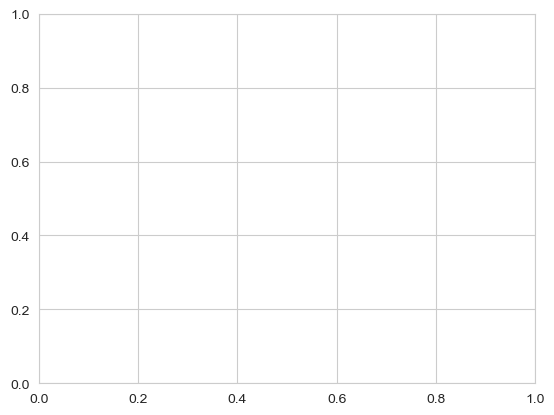

In [12]:
def plot_data_from_csv(filename):
    # Read the data from the CSV file
    time_data = []
    true_v = []
    true_n = []
    predict_v = []
    predict_n = []
    bound = []
    with open(filename, "r") as f:
        csv_reader = csv.reader(f)
        next(csv_reader) # skip the header row
        for row in csv_reader:
            time_data.append(float(row[0]))
            true_v.append(float(row[1]))
            true_n.append(float(row[2]))
            predict_v.append(float(row[3]))
            predict_n.append(float(row[4]))
            bound.append(float(row[5]))
    return true_v, true_n, predict_v, predict_n

sns.set_style('whitegrid')
sns.set_palette('colorblind')
font = "times new roman"
fontsizeT = 16
fontsizeL = 14
fig, ax2 = plt.subplots()

# Load CSV data
filename = "data/drone_data_2023-03-31_10-46_0_0.csv" 
true_v, true_n, predict_v, predict_n = plot_data_from_csv(filename)

velocities = np.linspace(0, 30, 250)
calc_load_factor_lists = []
calc_load_factor_list = []
bounds = []

for v in velocities:
    dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
    lift = clMax * WINGAREA * dynamic_pressure
    load_factor = lift / (MASS * G)
    calc_load_factor_list.append(load_factor)
calc_load_factor_lists.append(calc_load_factor_list)
for weight in clMaxWeights:
    calc_load_factor_list = []
    for v in velocities:
        dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
        lift = clMax * weight * WINGAREA * dynamic_pressure
        load_factor = lift / (MASS * G)
        calc_load_factor_list.append(load_factor)
    calc_load_factor_lists.append(calc_load_factor_list)

line_styles = ['-', '-', '-', '-', '-']
line_labels = ['$Cl_{Max}$', '$Cl_{Max}$ ⋅ 0.9', '$Cl_{Max}$ ⋅ 0.8', '$Cl_{Max}$ ⋅ 0.7', '$Cl_{Max}$ ⋅ 0.6']
line_colors = ['#03071E', '#370617', '#6A040F', '#9D0208', '#D00000']
line_opac = [1, 0.8, 0.6, 0.4, 0.2]

for load_factor, line_style, label, line_color, opacity in zip(calc_load_factor_lists, line_styles, line_labels, line_colors, line_opac):
    ax2.plot(velocities, load_factor, color=line_color, linestyle=line_style, label=label, alpha=1, linewidth=1)
    bounds.append((velocities, load_factor))

# Plot the data from the CSV file
ax2.plot(true_v, true_n, marker='o', linestyle='', markersize=4, label="True N")
ax2.plot(predict_v, predict_n, marker='o', linestyle='', markersize=4, label="Predicted N")

# structural limits
ax2.axhline(y=5, color='red', linestyle='--', alpha=1, linewidth=4, xmin=5, xmax=25)
ax2.axhline(y=-5, color='red', linestyle='--', alpha=1, linewidth=4, xmin=5, xmax=25)

ax2.set_xlim(left=0, right=25)
ax2.set_xlabel('Velocity', fontname=font, fontsize=fontsizeL)
ax2.set_ylim([-5, 5])
ax2.set_ylabel('Load Factor', fontname=font, fontsize=fontsizeL)
ax2.hlines(y=0, color='black', linestyle='-', alpha=1, linewidth=.5, xmin=0, xmax=35)
ax2.set_title('Load Factor vs. Velocity', fontname=font, fontsize=fontsizeT)
ax2.grid(visible=True)
ax2.legend(fontsize='small')

plt.show()


Font 'default' does not have a glyph for '\u22c5' [U+22c5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u22c5' [U+22c5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u22c5' [U+22c5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u22c5' [U+22c5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u22c5' [U+22c5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u22c5' [U+22c5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u22c5' [U+22c5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u22c5' [U+22c5], substituting with a dummy symbol.


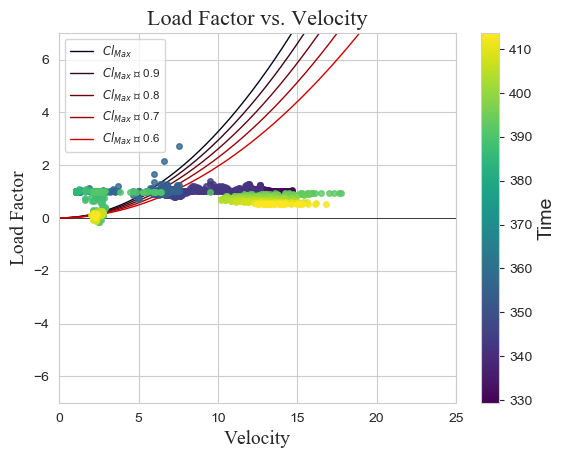

In [13]:
filename = "/home/taranto/catkin_ws/src/supervisor/flighttest/data/notused/drone_data_2023-04-21_14-04-39.csv" 
time_data = []
true_v = []
true_n = []
predict_v = []
predict_n = []
bound = []

with open(filename, "r") as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # skip the header row
    for row in csv_reader:
        time_data.append(float(row[0]))
        true_v.append(float(row[1]))
        true_n.append(float(row[2]))
        predict_v.append(float(row[3]))
        predict_n.append(float(row[4]))
        bound.append(float(row[5]))

sns.set_style('whitegrid')
sns.set_palette('colorblind')
font = "times new roman"
fontsizeT = 16
fontsizeL = 14
fig, ax2 = plt.subplots()

velocities = np.linspace(0, 30, 250)
calc_load_factor_lists = []
calc_load_factor_list = []
bounds = []

for v in velocities:
    dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
    lift = clMax * WINGAREA * dynamic_pressure
    load_factor = lift / (MASS * G)
    calc_load_factor_list.append(load_factor)
calc_load_factor_lists.append(calc_load_factor_list)
for weight in clMaxWeights:
    calc_load_factor_list = []
    for v in velocities:
        dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
        lift = clMax * weight * WINGAREA * dynamic_pressure
        load_factor = lift / (MASS * G)
        calc_load_factor_list.append(load_factor)
    calc_load_factor_lists.append(calc_load_factor_list)

line_styles = ['-', '-', '-', '-', '-']
line_labels = ['$Cl_{Max}$', '$Cl_{Max}$ ⋅ 0.9', '$Cl_{Max}$ ⋅ 0.8', '$Cl_{Max}$ ⋅ 0.7', '$Cl_{Max}$ ⋅ 0.6']
line_colors = ['#03071E', '#370617', '#6A040F', '#9D0208', '#D00000']
line_opac = [1, 0.8, 0.6, 0.4, 0.2]

for load_factor, line_style, label, line_color, opacity in zip(calc_load_factor_lists, line_styles, line_labels, line_colors, line_opac):
    ax2.plot(velocities, load_factor, color=line_color, linestyle=line_style, label=label, alpha=1, linewidth=1)
    bounds.append((velocities, load_factor))

# structural limits
ax2.axhline(y=5, color='red', linestyle='--', alpha=1, linewidth=4, xmin=5, xmax=25)
ax2.axhline(y=-5, color='red', linestyle='--', alpha=1, linewidth=4, xmin=5, xmax=25)

ax2.set_xlim(left=0, right=25)
ax2.set_xlabel('Velocity', fontname=font, fontsize=fontsizeL)
ax2.set_ylim([-7, 7])
ax2.set_ylabel('Load Factor', fontname=font, fontsize=fontsizeL)
ax2.hlines(y=0, color='black', linestyle='-', alpha=1, linewidth=.5, xmin=0, xmax=35)
ax2.set_title('Load Factor vs. Velocity', fontname=font, fontsize=fontsizeT)
ax2.grid(visible=True)
ax2.legend(fontsize='small')

# Plot data from the CSV file with a color gradient based on time
norm = plt.Normalize(min(time_data), max(time_data))
cmap = plt.get_cmap('viridis')
for t, true_v_i, true_n_i, predict_v_i, predict_n_i in zip(time_data, true_v, true_n, predict_v, predict_n):
    ax2.plot(true_v_i, true_n_i, marker='o', linestyle='', markersize=4, color=cmap(norm(t)), alpha=0.8)
    ax2.plot(predict_v_i, predict_n_i, marker='o', linestyle='', markersize=4, color=cmap(norm(t)), alpha=0.8)

# Add a colorbar to represent the time gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = plt.colorbar(sm, ax=ax2)
cb.set_label('Time', fontsize=fontsizeL)

plt.show()

In [14]:
filename = "data/drone_data_2023-03-31_15-58-40_0_0.csv" 
time_data = []
true_v = []
true_n = []
predict_v = []
predict_n = []
bound = []

with open(filename, "r") as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # skip the header row
    for row in csv_reader:
        time_data.append(float(row[0]))
        true_v.append(float(row[1]))
        true_n.append(float(row[2]))
        predict_v.append(float(row[3]))
        predict_n.append(float(row[4]))
        bound.append(float(row[5]))

sns.set_style('darkgrid')
sns.set_palette('colorblind')
font = "times new roman"
fontsizeT = 16
fontsizeL = 14
fig, ax3 = plt.subplots()

velocities = np.linspace(0, 30, 250)
calc_load_factor_lists = []
calc_load_factor_list = []
bounds = []

for v in velocities:
    dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
    lift = clMax * WINGAREA * dynamic_pressure
    load_factor = lift / (MASS * G)
    calc_load_factor_list.append(load_factor)
calc_load_factor_lists.append(calc_load_factor_list)
for weight in clMaxWeights:
    calc_load_factor_list = []
    for v in velocities:
        dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
        lift = clMax * weight * WINGAREA * dynamic_pressure
        load_factor = lift / (MASS * G)
        calc_load_factor_list.append(load_factor)
    calc_load_factor_lists.append(calc_load_factor_list)

line_styles = ['-', '-', '-', '-', '-']
line_labels = ['$Cl_{Max}$', '$Cl_{Max}$ ⋅ 0.9', '$Cl_{Max}$ ⋅ 0.8', '$Cl_{Max}$ ⋅ 0.7', '$Cl_{Max}$ ⋅ 0.6']
line_colors = ['#03071E', '#370617', '#6A040F', '#9D0208', '#D00000']
line_opac = [1, 0.8, 0.6, 0.4, 0.2]

for load_factor, line_style, label, line_color, opacity in zip(calc_load_factor_lists, line_styles, line_labels, line_colors, line_opac):
    ax3.plot(velocities, load_factor, color=line_color, linestyle=line_style, label=label, alpha=.5, linewidth=1)
    bounds.append((velocities, load_factor))

ax3.set_xlim(left=0, right=25)
ax3.set_xlabel('Velocity', fontname=font, fontsize=fontsizeL)
ax3.set_ylim([-5, 5])
ax3.set_ylabel('Load Factor', fontname=font, fontsize=fontsizeL)
ax3.hlines(y=0, color='black', linestyle='-', alpha=1, linewidth=.5, xmin=0, xmax=35)
ax3.set_title('Load Factor vs. Velocity', fontname=font, fontsize=fontsizeT)
ax3.grid(visible=True)
ax3.legend(fontsize='small')

# Plot data from the CSV file with a color gradient based on time
norm = plt.Normalize(min(time_data), max(time_data))
cmap1 = plt.get_cmap('Reds')
cmap2 = plt.get_cmap('Blues')
for t, true_v_i, true_n_i, predict_v_i, predict_n_i in zip(time_data, true_v, true_n, predict_v, predict_n):
    ax3.plot(true_v_i, true_n_i, marker='o', linestyle='', markersize=2, color='blue', alpha=1, zorder=3)
    ax3.plot(predict_v_i, predict_n_i, marker='o', linestyle='', markersize=2, color='red', alpha=1, zorder=3)
# Add a colorbar to represent the time gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# cb = plt.colorbar(sm, ax=ax3)
cb.set_label('Time', fontsize=fontsizeL)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/drone_data_2023-03-31_15-58-40_0_0.csv'

In [ ]:
filenames = ["data/drone_data_2023-03-31_15-48_90_0.csv", "data/drone_data_2023-03-31_15-50_75_0.csv", "data/drone_data_2023-03-31_15-51_60_0.csv", "data/drone_data_2023-03-31_15-53_45_0.csv", "data/drone_data_2023-03-31_15-55_30_0.csv", "data/drone_data_2023-03-31_15-56_15_0.csv", "data/drone_data_2023-03-31_15-58-40_0_0.csv", "data/drone_data_2023-03-31_15-59-57_-15_0.csv", "data/drone_data_2023-03-31_16-00-44_-30_0.csv", "data/drone_data_2023-03-31_16-01-18_-45_0.csv", "data/drone_data_2023-03-31_16-01-56_-60_0.csv", "data/drone_data_2023-03-31_16-02-39_-75_0.csv", "data/drone_data_2023-03-31_16-03-20_-90_0.csv"] 
time_data = []
true_v = []
true_n = []
predict_v = []
predict_n = []
bound = []

In [ ]:
for file in filenames:
    df = pd.read_csv(file)
    time_data.extend(df['time'].tolist())
    true_v.extend(df['true_velocity'].tolist())
    true_n.extend(df['n_true'].tolist())
    predict_v.extend(df['predicted_velocity'].tolist())
    predict_n.extend(df['predicted_n'].tolist())
    bound.extend(df['bounds_crossed'].tolist())

    plt.plot(true_v, true_n, label='V-n', marker='o', linestyle='', markersize=1, color='blue', alpha=1, zorder=3)
    # plt.plot(time_data, predict_v, label='Predicted Velocity')
    plt.xlabel('Time')
    plt.ylabel('Velocity')
    plt.title(file)
    plt.legend()
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/drone_data_2023-03-31_15-48_90_0.csv'

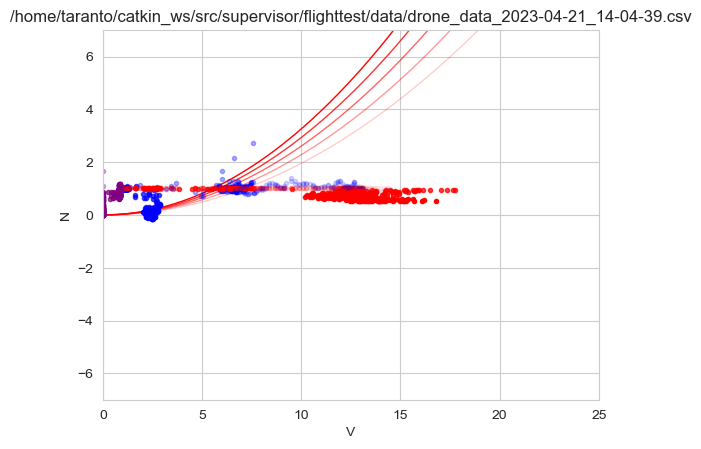

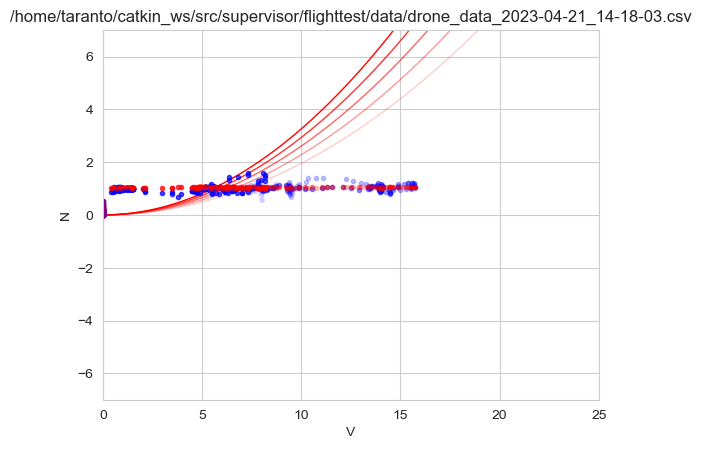

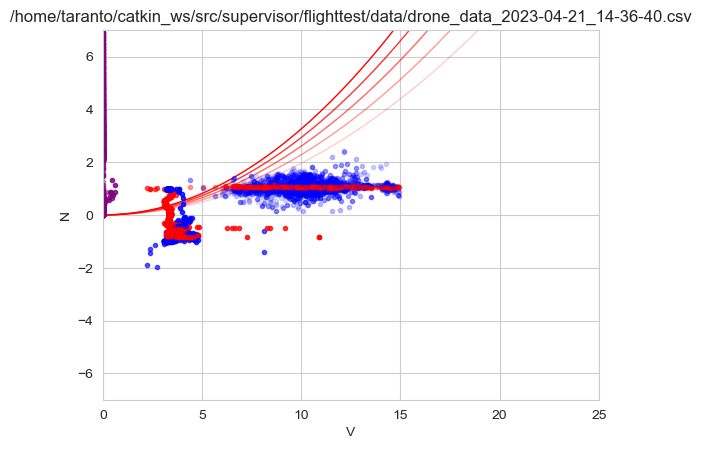

In [ ]:
filenames = ["/home/taranto/catkin_ws/src/supervisor/flighttest/data/drone_data_2023-04-21_14-04-39.csv", "/home/taranto/catkin_ws/src/supervisor/flighttest/data/drone_data_2023-04-21_14-18-03.csv", "/home/taranto/catkin_ws/src/supervisor/flighttest/data/drone_data_2023-04-21_14-36-40.csv"] 
time_data = []
true_v = []
true_n = []
predict_v = []
predict_n = []
bound = []
bounds = []
sns.set_style('whitegrid')
# sns.set_palette('colorblind')
font = "times new roman"
fontsizeT = 16
fontsizeL = 14

line_styles = ['-', '-', '-', '-', '-']
line_labels = ['$Cl_{Max}$', '$Cl_{Max}$ ⋅ 0.9', '$Cl_{Max}$ ⋅ 0.8', '$Cl_{Max}$ ⋅ 0.7', '$Cl_{Max}$ ⋅ 0.6']
line_colors = ['#03071E', '#370617', '#6A040F', '#9D0208', '#D00000']
line_opac = [1, 0.8, 0.6, 0.4, 0.2]

velocities = np.linspace(0, 30, 250)
calc_load_factor_lists = []
calc_load_factor_list = []
bounds = []

for v in velocities:
    dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
    lift = clMax * WINGAREA * dynamic_pressure
    load_factor = lift / (MASS * G)
    calc_load_factor_list.append(load_factor)
calc_load_factor_lists.append(calc_load_factor_list)

for weight in clMaxWeights:
    calc_load_factor_list = []
    for v in velocities:
        dynamic_pressure = 0.5 * AIR_DENSITY * v ** 2
        lift = clMax * weight * WINGAREA * dynamic_pressure
        load_factor = lift / (MASS * G)
        calc_load_factor_list.append(load_factor)
    calc_load_factor_lists.append(calc_load_factor_list)

line_styles = ['-', '-', '-', '-', '-']
line_labels = ['$Cl_{Max}$', '$Cl_{Max}$ ⋅ 0.9', '$Cl_{Max}$ ⋅ 0.8', '$Cl_{Max}$ ⋅ 0.7', '$Cl_{Max}$ ⋅ 0.6']
line_colors = ['red', 'red', 'red', 'red', 'red']
line_opac = [1, 0.8, 0.6, 0.4, 0.2]

def plot_static_data(ax):
    for load_factor, line_style, label, line_color, opacity in zip(calc_load_factor_lists, line_styles, line_labels, line_colors, line_opac):
        ax.plot(velocities, load_factor, color=line_color, linestyle=line_style, label=label, alpha=opacity, linewidth=1)

for i, file in enumerate(filenames):
    fig, ax5 = plt.subplots()
    plot_static_data(ax5)

    df = pd.read_csv(file)
    time_data = df['time'].tolist()
    true_v = df['true_velocity'].tolist()
    true_n = df['n_true'].tolist()
    predict_v = df['predicted_velocity'].tolist()
    predict_n = df['predicted_n'].tolist()
    bound = df['bounds_crossed'].tolist()

    for i in range(len(time_data)):
        # Calculate alpha value based on time
        alpha_val = (time_data[i] - time_data[0]) / (time_data[-1] - time_data[0])
        ax5.plot(true_v[i], true_n[i], 'o', alpha=alpha_val, markersize=3, color='blue', label='True Data' if i == 0 else None)
        ax5.plot(predict_v[i], predict_n[i], 'o', alpha=alpha_val, markersize=3, color='red',  label='Predicted Data' if i == 0 else None)
        # error_vel = abs((predict_v[i] - true_v[i])/true_v[i])
        # error_n = abs((predict_n[i] - true_n[i])/true_n[i])
        error_vel = abs((true_v[i] - predict_v[i])/predict_v[i])
        error_n = abs((true_n[i] - predict_n[i])/predict_n[i])
        ax5.plot(error_vel, error_n, 'o', alpha=alpha_val, markersize=3, color='purple',  label='Error' if i == 0 else None)
    

    ax5.set_ylim([-7, 7])
    ax5.set_xlim(left=0, right=25)
    ax5.set_xlabel('V')
    ax5.set_ylabel('N')
    ax5.set_title(file)
    slicefile = file[:-7]
    # fig.savefig(f"svgs/{slicefile}.svg")

    # ax5.legend()
    # ax5.show()